# Compute distance between objects representations for every mice 

Here we compute distance in the pca and cca space for every mice. We take the average of the event alight to the onset in the pc or cc space, and then compute euclidean distance time point by time point. We compute the mean distance per day, and then do the statistics over it for every mice. 

In [6]:
#import useful libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import pickle
import configuration
import general_statistics as stats
import figures as figs
import matplotlib.cm as cm
from matplotlib import colors
from scipy import signal
from scipy import stats as sstats
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import scipy
cmap = cm.jet
import math
from sklearn.datasets import load_iris
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_decomposition import CCA
from sklearn.model_selection import cross_val_score
import random
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

In [ ]:
input_directory = os.environ['PROJECT_DIR'] + 'neural_analysis/data/cc_pc_distance/'

figure_path = os.environ['PROJECT_DIR'] +'neural_analysis/figures/trial_aligned_events/distance_mean_representations/distance_statistics/'

In [ ]:
mouse_vector = [56165, 56166, 32363, 32364, 32365, 32366, 411857]
conditions_vector = ['RANDOM', 'OVERLAPPING','STABLE']
sessions_random = [4,1,1,0,2,3,2]
sessions_overlapping = [1,2,2,1,3,0,3]
sessions_stable = [0,0,0,2,0,0,1]

decoding_v = 1            ## decoding version, normaly equal to one
motion_correction_v = 20  ### 100 means everything was aligned, 200 means it was also equalized, 20 is for day wise
alignment_v = 3           ## alignment version, version 3 is for day wise
equalization_v = 0        ## equalization version
source_extraction_v = 1   ## source extraction version
component_evaluation_v = 1 ## component evaluation version

# here we will do analysis with no registration
# registration_v = 2        ## registration version
sf = 10                   ## sampling frequency of the original signal 
re_sf= 1                 ## value of resampling
session_now = 1
period = int(5 * sf / re_sf)
period_resting = period *50
fixed = 'None'

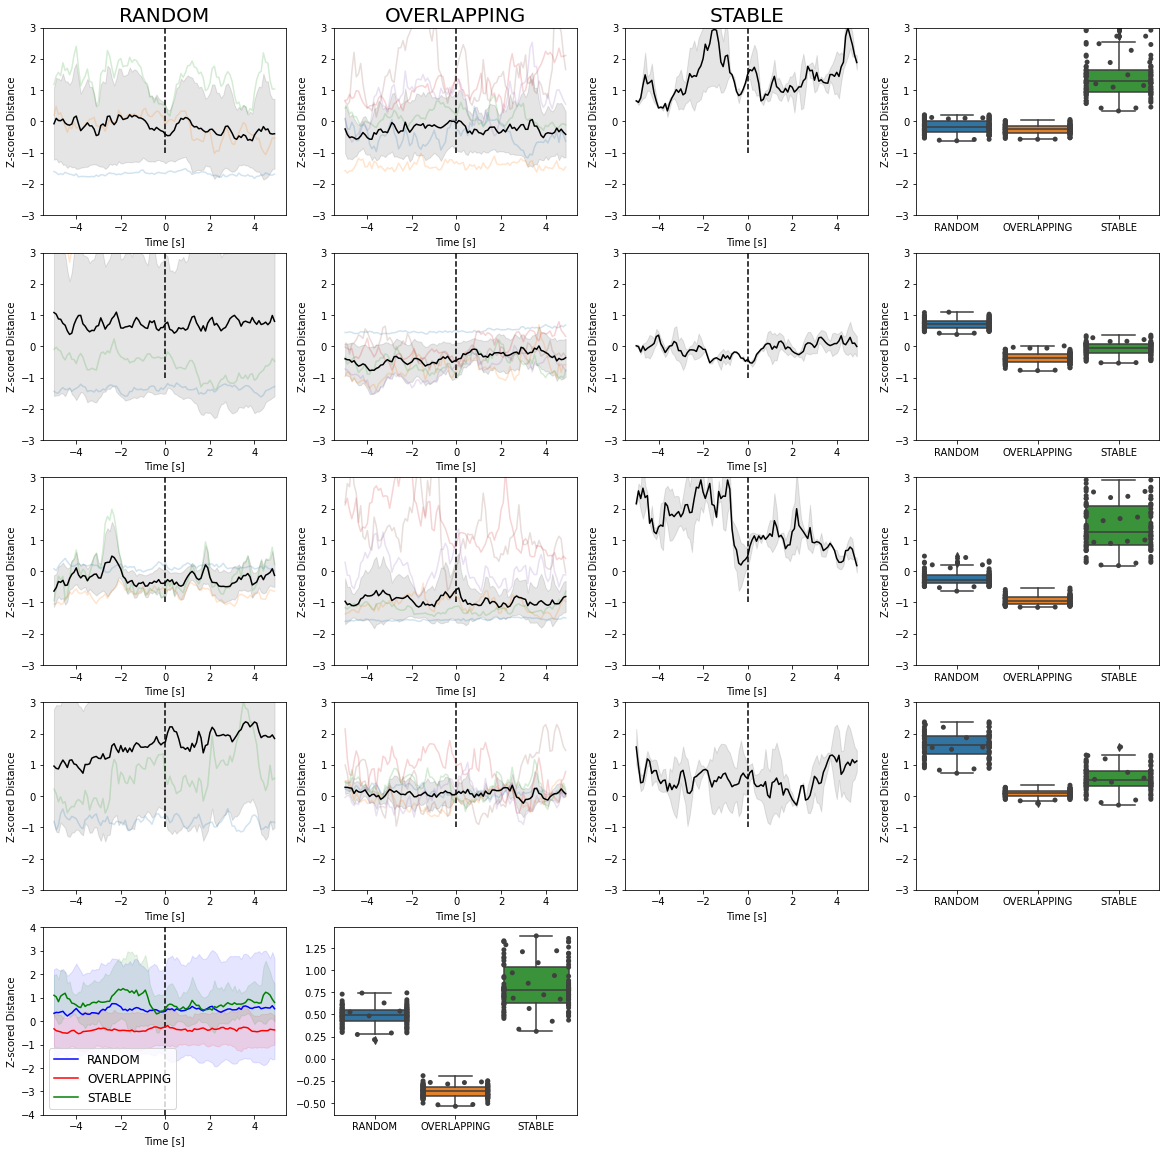

In [14]:
figure = plt.figure()
gs = plt.GridSpec(5, 4)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-50,50)/10

random_list = []
overlapping_list = []
stable_list = []

for day in range(4):
    
    random_list_day = []
    overlapping_list_day = []
    stable_list_day = []
    ax1 = figure.add_subplot(gs[day,0])
    ax2 = figure.add_subplot(gs[day,1])
    ax3 = figure.add_subplot(gs[day,2])
    ax4 = figure.add_subplot(gs[day,3])

    if day == 0:
        ax1.set_title('RANDOM', fontsize = 20)
        ax2.set_title('OVERLAPPING', fontsize = 20)
        ax3.set_title('STABLE', fontsize = 20)

    
    ax1.set_ylim([-3,3])
    ax1.vlines(0,-1,10, 'k','--')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Z-scored Distance')
    
    ax2.set_ylim([-3,3])
    ax2.vlines(0,-1,10, 'k','--')
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Z-scored Distance')
    
    ax3.set_ylim([-3,3])
    ax3.vlines(0,-1,10, 'k','--')
    ax3.set_xlabel('Time [s]')
    ax3.set_ylabel('Z-scored Distance')
    
    ax4.set_ylim([-3,3])
    ax4.set_ylabel('Z-scored Distance')


    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax1.plot(time,cc_distance,alpha = 0.2)
                random_list.append(cc_distance)
                random_list_day.append(cc_distance)
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax2.plot(time,cc_distance,alpha = 0.2)
                overlapping_list.append(cc_distance)
                overlapping_list_day.append(cc_distance)

        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                if math.isinf(cc_distance[0]):
                    print('mouse:' + f'{mouse}' + '_session_' + f'{session}' + '_day_' + f'{day}')
                if ~math.isinf(cc_distance[1]):
                    ax2.plot(time,cc_distance,alpha = 0.2)
                    stable_list.append(cc_distance)
                    stable_list_day.append(cc_distance)

    plot_list = []
    random_mean = np.mean(random_list_day,0)
    random_std =  np.std(random_list_day,0)
    ax1.plot(time,random_mean,'k')
    ax1.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)
    
    random_mean = np.mean(overlapping_list_day,0)
    random_std =  np.std(overlapping_list_day,0)
    ax2.plot(time,random_mean,'k')
    ax2.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)

    random_mean = np.mean(stable_list_day,0)
    random_std =  np.std(stable_list_day,0)
    ax3.plot(time,random_mean,'k')
    ax3.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)
    
    ax4 = sns.boxplot(data = plot_list, orient = 'v')
    ax4 = sns.swarmplot(data=plot_list, color=".25")
    ax4.set_xticklabels(label)
    
plot_list = []
ax0 = figure.add_subplot(gs[4,0])
random_mean = np.mean(random_list,0)
random_std =  np.std(random_list,0)
ax0.plot(time,random_mean,'b')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
plot_list.append(random_mean)

random_mean = np.mean(overlapping_list,0)
random_std =  np.std(overlapping_list,0)
ax0.plot(time,random_mean,'r')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
plot_list.append(random_mean)

random_mean = np.mean(stable_list,0)
random_std =  np.std(stable_list,0)
ax0.plot(time,random_mean,'g')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
plot_list.append(random_mean)

ax0.set_ylim([-4,4])
ax0.vlines(0,-4,4, 'k','--')
ax0.set_xlabel('Time [s]')
ax0.set_ylabel('Z-scored Distance')
ax0.legend(['RANDOM','OVERLAPPING','STABLE'], fontsize = 12)

ax1 = figure.add_subplot(gs[4,1])

ax1 = sns.boxplot(data = plot_list, orient = 'v')
ax1 = sns.swarmplot(data=plot_list, color=".25")
ax1.set_xticklabels(label)


figure.set_size_inches(20,20)
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'CCA.png')

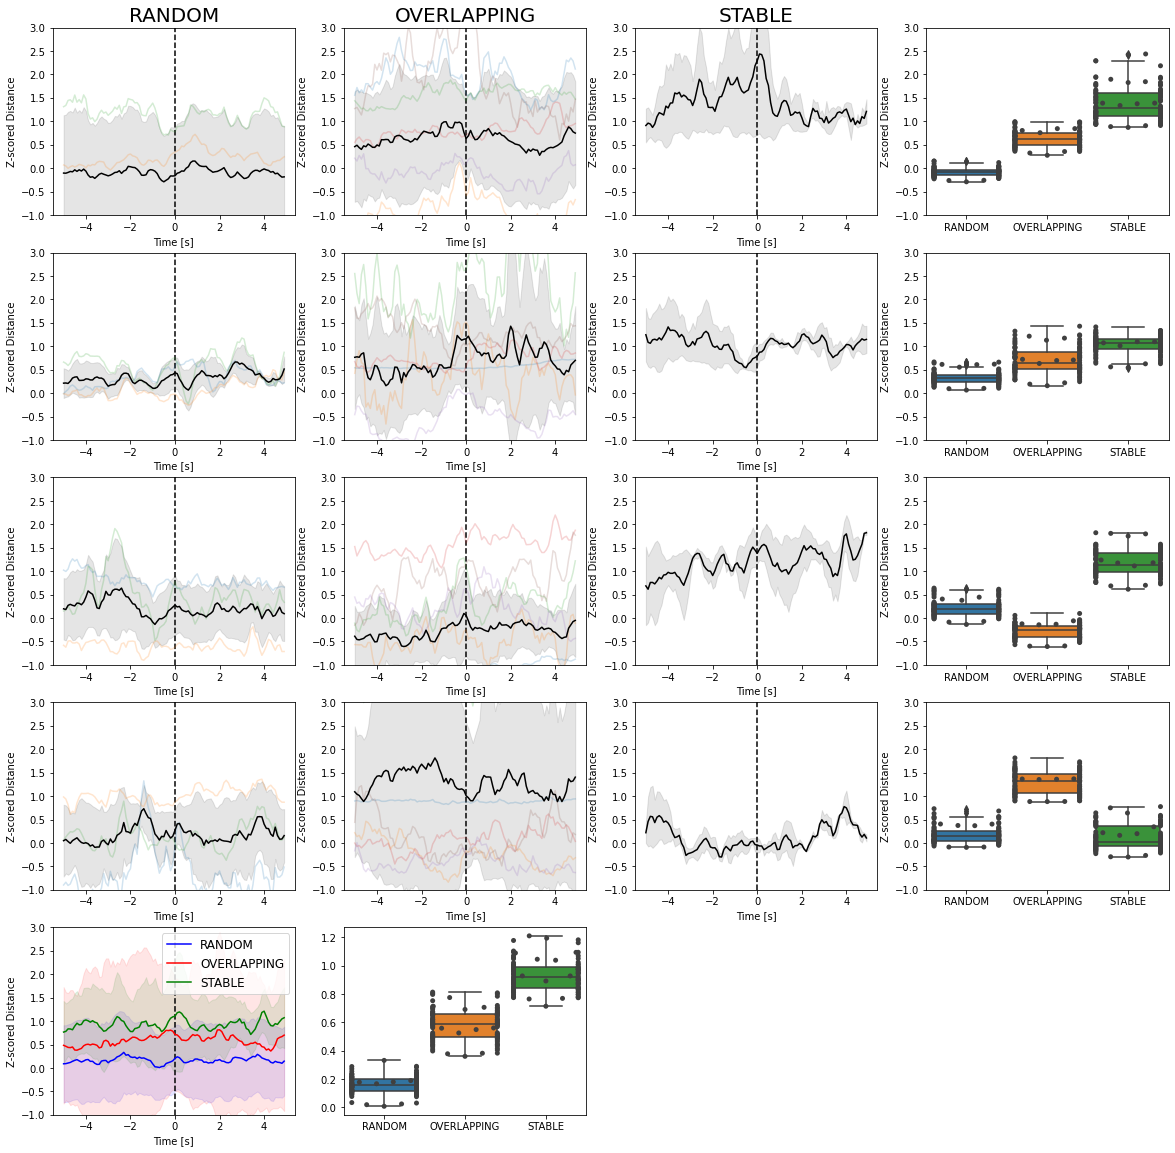

In [12]:
figure = plt.figure()
gs = plt.GridSpec(5, 4)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-50,50)/10

random_list = []
overlapping_list = []
stable_list = []

for day in range(4):
    
    random_list_day = []
    overlapping_list_day = []
    stable_list_day = []
    ax1 = figure.add_subplot(gs[day,0])
    ax2 = figure.add_subplot(gs[day,1])
    ax3 = figure.add_subplot(gs[day,2])
    ax4 = figure.add_subplot(gs[day,3])
    if day == 0:
        ax1.set_title('RANDOM', fontsize = 20)
        ax2.set_title('OVERLAPPING', fontsize = 20)
        ax3.set_title('STABLE', fontsize = 20)
    
    ax1.set_ylim([-1,3])
    ax1.vlines(0,-1,10, 'k','--')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Z-scored Distance')
    
    ax2.set_ylim([-1,3])
    ax2.vlines(0,-1,10, 'k','--')
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Z-scored Distance')
    
    ax3.set_ylim([-1,3])
    ax3.vlines(0,-1,10, 'k','--')
    ax3.set_xlabel('Time [s]')
    ax3.set_ylabel('Z-scored Distance')
    
    ax4.set_ylim([-1,3])
    ax4.set_ylabel('Z-scored Distance')


    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax1.plot(time,cc_distance,alpha = 0.2)
                random_list.append(cc_distance)
                random_list_day.append(cc_distance)
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax2.plot(time,cc_distance,alpha = 0.2)
                overlapping_list.append(cc_distance)
                overlapping_list_day.append(cc_distance)

        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax2.plot(time,cc_distance,alpha = 0.2)
                stable_list.append(cc_distance)
                stable_list_day.append(cc_distance)

    plot_list = []
    random_mean = np.mean(random_list_day,0)
    random_std =  np.std(random_list_day,0)
    ax1.plot(time,random_mean,'k')
    ax1.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)
    
    random_mean = np.mean(overlapping_list_day,0)
    random_std =  np.std(overlapping_list_day,0)
    ax2.plot(time,random_mean,'k')
    ax2.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)

    random_mean = np.mean(stable_list_day,0)
    random_std =  np.std(stable_list_day,0)
    ax3.plot(time,random_mean,'k')
    ax3.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)
    
    ax4 = sns.boxplot(data = plot_list, orient = 'v')
    ax4 = sns.swarmplot(data=plot_list, color=".25")
    ax4.set_xticklabels(label)
    
plot_list = []
ax0 = figure.add_subplot(gs[4,0])
random_mean = np.mean(random_list,0)
random_std =  np.std(random_list,0)
ax0.plot(time,random_mean,'b')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
plot_list.append(random_mean)

random_mean = np.mean(overlapping_list,0)
random_std =  np.std(overlapping_list,0)
ax0.plot(time,random_mean,'r')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
plot_list.append(random_mean)

random_mean = np.mean(stable_list,0)
random_std =  np.std(stable_list,0)
ax0.plot(time,random_mean,'g')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
plot_list.append(random_mean)

ax0.set_ylim([-1,3])
ax0.vlines(0,-1,10, 'k','--')
ax0.set_xlabel('Time [s]')
ax0.set_ylabel('Z-scored Distance')
ax0.legend(['RANDOM','OVERLAPPING','STABLE'], fontsize = 12)

ax1 = figure.add_subplot(gs[4,1])

ax1 = sns.boxplot(data = plot_list, orient = 'v')
ax1 = sns.swarmplot(data=plot_list, color=".25")
ax1.set_xticklabels(label)


figure.set_size_inches(20,20)
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'PCA.png')

In [55]:
figure = plt.figure()
gs = plt.GridSpec(1, 2)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-50,50)/10

random_list = []
overlapping_list = []
stable_list = []

random = np.zeros((4,1))
stable = np.zeros((4,1))
overlapping = np.zeros((4,1))

random_std = np.zeros((4,1))
stable_std = np.zeros((4,1))
overlapping_std = np.zeros((4,1))

for day in range(4):
    
    random_list_day = []
    overlapping_list_day = []
    stable_list_day = []

    if day == 0:
        ax1.set_title('RANDOM', fontsize = 20)
        ax2.set_title('OVERLAPPING', fontsize = 20)
        ax3.set_title('STABLE', fontsize = 20)
        
    ax1.set_ylim([-3,3])
    ax1.vlines(0,-1,10, 'k','--')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Z-scored Distance')
    
    ax2.set_ylim([-3,3])
    ax2.vlines(0,-1,10, 'k','--')
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Z-scored Distance')
    
    ax3.set_ylim([-3,3])
    ax3.vlines(0,-1,10, 'k','--')
    ax3.set_xlabel('Time [s]')
    ax3.set_ylabel('Z-scored Distance')
    
    ax4.set_ylim([-3,3])
    ax4.set_ylabel('Z-scored Distance')


    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax1.plot(time,cc_distance,alpha = 0.2)
                random_list.append(cc_distance)
                random_list_day.append(cc_distance)
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax2.plot(time,cc_distance,alpha = 0.2)
                overlapping_list.append(cc_distance)
                overlapping_list_day.append(cc_distance)

        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'cca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                if math.isinf(cc_distance[0]):
                    print('mouse:' + f'{mouse}' + '_session_' + f'{session}' + '_day_' + f'{day}')
                if ~math.isinf(cc_distance[1]):
                    ax2.plot(time,cc_distance,alpha = 0.2)
                    stable_list.append(cc_distance)
                    stable_list_day.append(cc_distance)


    random_mean = np.mean(np.mean(random_list_day,1))
    random_std_ =  np.std(np.mean(random_list_day,1))
    random[day,0] = random_mean
    random_std[day,0] = random_std_
    
    random_mean = np.mean(np.mean(overlapping_list_day,1))
    random_std_ =  np.std(np.mean(overlapping_list_day,1))
    overlapping[day,0] = random_mean
    overlapping_std[day,0] = random_std_
    
    random_mean = np.mean(np.mean(stable_list_day,1))
    random_std_ =  np.std(np.mean(stable_list_day,1))
    stable[day,0] = random_mean
    stable_std[day,0] = random_std_

<Figure size 432x288 with 0 Axes>

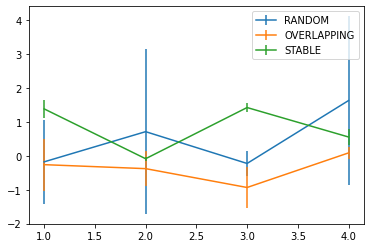

In [56]:
plt.errorbar(np.arange(1,5),random[:,0],random_std[:,0])
plt.errorbar(np.arange(1,5),overlapping[:,0],overlapping_std[:,0])
plt.errorbar(np.arange(1,5),stable[:,0],stable_std[:,0])

plt.legend(['RANDOM','OVERLAPPING','STABLE'])
plt.savefig(figure_path + 'CCA_days.png')

In [57]:
figure = plt.figure()
gs = plt.GridSpec(1, 2)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-50,50)/10

random_list = []
overlapping_list = []
stable_list = []

random = np.zeros((4,1))
stable = np.zeros((4,1))
overlapping = np.zeros((4,1))

random_std = np.zeros((4,1))
stable_std = np.zeros((4,1))
overlapping_std = np.zeros((4,1))

for day in range(4):
    
    random_list_day = []
    overlapping_list_day = []
    stable_list_day = []

    if day == 0:
        ax1.set_title('RANDOM', fontsize = 20)
        ax2.set_title('OVERLAPPING', fontsize = 20)
        ax3.set_title('STABLE', fontsize = 20)
        
    ax1.set_ylim([-3,3])
    ax1.vlines(0,-1,10, 'k','--')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Z-scored Distance')
    
    ax2.set_ylim([-3,3])
    ax2.vlines(0,-1,10, 'k','--')
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Z-scored Distance')
    
    ax3.set_ylim([-3,3])
    ax3.vlines(0,-1,10, 'k','--')
    ax3.set_xlabel('Time [s]')
    ax3.set_ylabel('Z-scored Distance')
    
    ax4.set_ylim([-3,3])
    ax4.set_ylabel('Z-scored Distance')


    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax1.plot(time,cc_distance,alpha = 0.2)
                random_list.append(cc_distance)
                random_list_day.append(cc_distance)
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax2.plot(time,cc_distance,alpha = 0.2)
                overlapping_list.append(cc_distance)
                overlapping_list_day.append(cc_distance)

        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'pca_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                if math.isinf(cc_distance[0]):
                    print('mouse:' + f'{mouse}' + '_session_' + f'{session}' + '_day_' + f'{day}')
                if ~math.isinf(cc_distance[1]):
                    ax2.plot(time,cc_distance,alpha = 0.2)
                    stable_list.append(cc_distance)
                    stable_list_day.append(cc_distance)


    random_mean = np.mean(np.mean(random_list_day,1))
    random_std_ =  np.std(np.mean(random_list_day,1))
    random[day,0] = random_mean
    random_std[day,0] = random_std_
    
    random_mean = np.mean(np.mean(overlapping_list_day,1))
    random_std_ =  np.std(np.mean(overlapping_list_day,1))
    overlapping[day,0] = random_mean
    overlapping_std[day,0] = random_std_
    
    random_mean = np.mean(np.mean(stable_list_day,1))
    random_std_ =  np.std(np.mean(stable_list_day,1))
    stable[day,0] = random_mean
    stable_std[day,0] = random_std_

<Figure size 432x288 with 0 Axes>

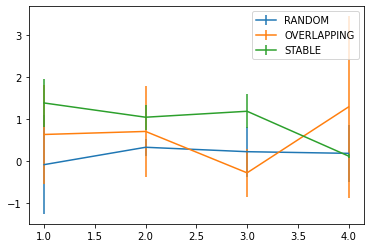

In [58]:
plt.errorbar(np.arange(1,5),random[:,0],random_std[:,0])
plt.errorbar(np.arange(1,5),overlapping[:,0],overlapping_std[:,0])
plt.errorbar(np.arange(1,5),stable[:,0],stable_std[:,0])

plt.legend(['RANDOM','OVERLAPPING','STABLE'])
plt.savefig(figure_path + 'PCA_days.png')

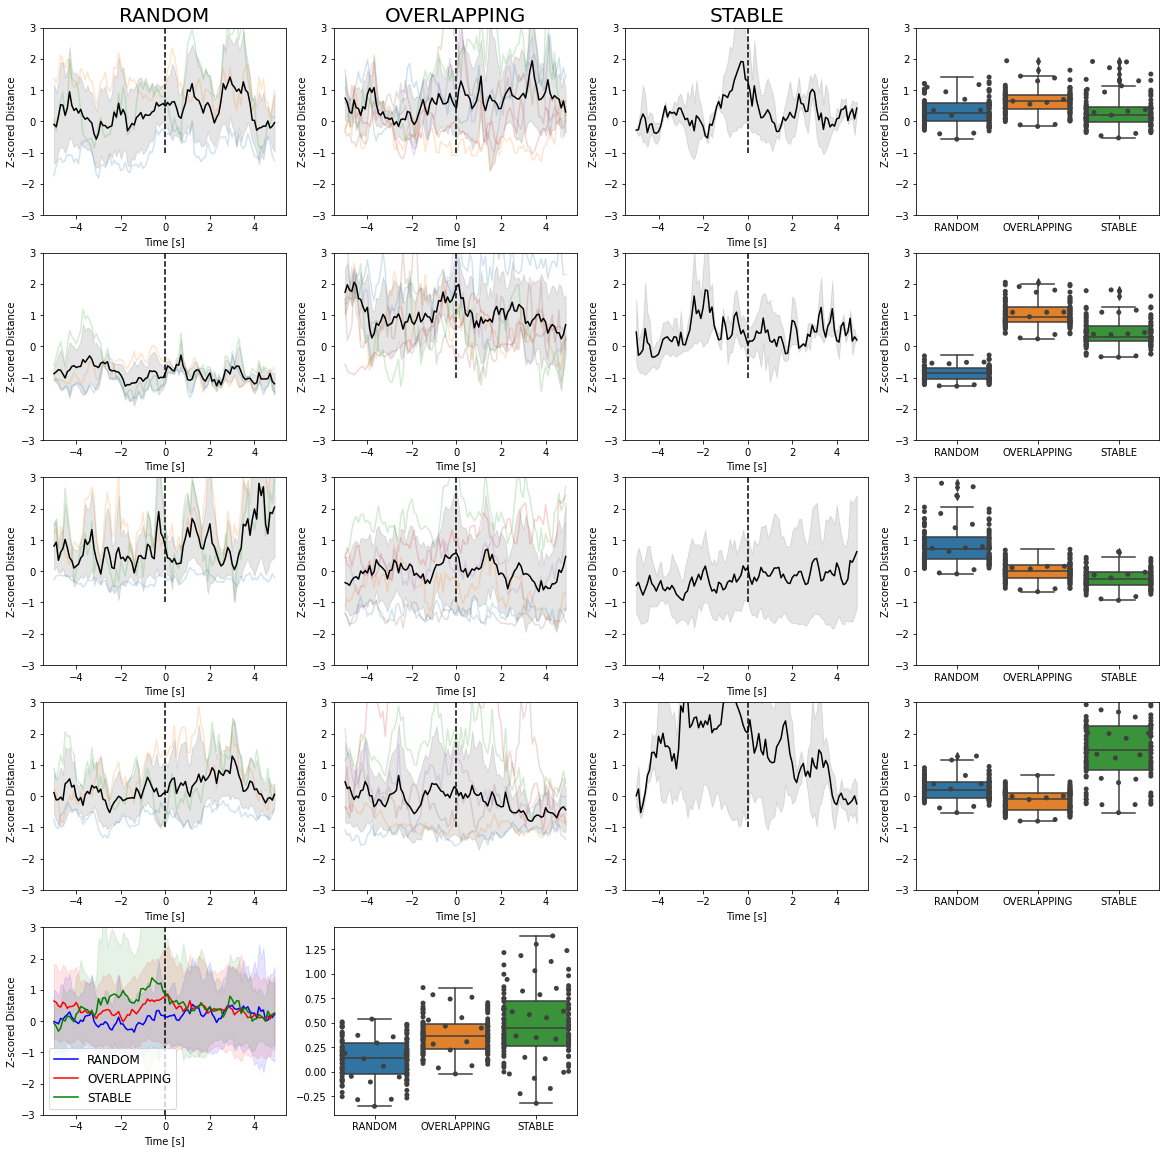

In [13]:



figure = plt.figure()
gs = plt.GridSpec(5, 4)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-50,50)/10

random_list = []
overlapping_list = []
stable_list = []

for day in range(4):
    
    random_list_day = []
    overlapping_list_day = []
    stable_list_day = []
    ax1 = figure.add_subplot(gs[day,0])
    ax2 = figure.add_subplot(gs[day,1])
    ax3 = figure.add_subplot(gs[day,2])
    ax4 = figure.add_subplot(gs[day,3])

    if day == 0:
        ax1.set_title('RANDOM', fontsize = 20)
        ax2.set_title('OVERLAPPING', fontsize = 20)
        ax3.set_title('STABLE', fontsize = 20)

    
    ax1.set_ylim([-3,3])
    ax1.vlines(0,-1,10, 'k','--')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Z-scored Distance')
    
    ax2.set_ylim([-3,3])
    ax2.vlines(0,-1,10, 'k','--')
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Z-scored Distance')
    
    ax3.set_ylim([-3,3])
    ax3.vlines(0,-1,10, 'k','--')
    ax3.set_xlabel('Time [s]')
    ax3.set_ylabel('Z-scored Distance')
    
    ax4.set_ylim([-3,3])
    ax4.set_ylabel('Z-scored Distance')


    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax1.plot(time,cc_distance,alpha = 0.2)
                random_list.append(cc_distance)
                random_list_day.append(cc_distance)
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax2.plot(time,cc_distance,alpha = 0.2)
                overlapping_list.append(cc_distance)
                overlapping_list_day.append(cc_distance)

        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                if math.isinf(cc_distance[0]):
                    print('mouse:' + f'{mouse}' + '_session_' + f'{session}' + '_day_' + f'{day}')
                if ~math.isinf(cc_distance[1]):
                    ax2.plot(time,cc_distance,alpha = 0.2)
                    stable_list.append(cc_distance)
                    stable_list_day.append(cc_distance)

    plot_list = []
    random_mean = np.mean(random_list_day,0)
    random_std =  np.std(random_list_day,0)
    ax1.plot(time,random_mean,'k')
    ax1.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)
    
    random_mean = np.mean(overlapping_list_day,0)
    random_std =  np.std(overlapping_list_day,0)
    ax2.plot(time,random_mean,'k')
    ax2.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)

    random_mean = np.mean(stable_list_day,0)
    random_std =  np.std(stable_list_day,0)
    ax3.plot(time,random_mean,'k')
    ax3.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'k', facecolor = 'k') 
    plot_list.append(random_mean)
    
    ax4 = sns.boxplot(data = plot_list, orient = 'v')
    ax4 = sns.swarmplot(data=plot_list, color=".25")
    ax4.set_xticklabels(label)
    
plot_list = []
ax0 = figure.add_subplot(gs[4,0])
random_mean = np.mean(random_list,0)
random_std =  np.std(random_list,0)
ax0.plot(time,random_mean,'b')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'b', facecolor = 'b')
plot_list.append(random_mean)

random_mean = np.mean(overlapping_list,0)
random_std =  np.std(overlapping_list,0)
ax0.plot(time,random_mean,'r')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'r', facecolor = 'r')
plot_list.append(random_mean)

random_mean = np.mean(stable_list,0)
random_std =  np.std(stable_list,0)
ax0.plot(time,random_mean,'g')
ax0.fill_between(time,random_mean-random_std,random_mean+random_std,alpha = 0.1, edgecolor = 'g', facecolor = 'g')
plot_list.append(random_mean)

ax0.set_ylim([-3,3])
ax0.vlines(0,-3,3, 'k','--')
ax0.set_xlabel('Time [s]')
ax0.set_ylabel('Z-scored Distance')
ax0.legend(['RANDOM','OVERLAPPING','STABLE'], fontsize = 12)

ax1 = figure.add_subplot(gs[4,1])

ax1 = sns.boxplot(data = plot_list, orient = 'v')
ax1 = sns.swarmplot(data=plot_list, color=".25")
ax1.set_xticklabels(label)


figure.set_size_inches(20,20)
figure.patch.set_facecolor('white')

figure.savefig(figure_path + 'LDA.png')

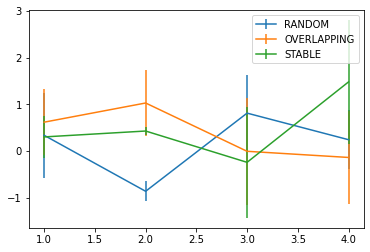

In [10]:
figure = plt.figure()
gs = plt.GridSpec(1, 2)
label = ['RANDOM','OVERLAPPING','STABLE']

time = np.arange(-50,50)/10

random_list = []
overlapping_list = []
stable_list = []

random = np.zeros((4,1))
stable = np.zeros((4,1))
overlapping = np.zeros((4,1))

random_std = np.zeros((4,1))
stable_std = np.zeros((4,1))
overlapping_std = np.zeros((4,1))

for day in range(4):
    
    random_list_day = []
    overlapping_list_day = []
    stable_list_day = []

    if day == 0:
        ax1.set_title('RANDOM', fontsize = 20)
        ax2.set_title('OVERLAPPING', fontsize = 20)
        ax3.set_title('STABLE', fontsize = 20)
        
    ax1.set_ylim([-3,3])
    ax1.vlines(0,-1,10, 'k','--')
    ax1.set_xlabel('Time [s]')
    ax1.set_ylabel('Z-scored Distance')
    
    ax2.set_ylim([-3,3])
    ax2.vlines(0,-1,10, 'k','--')
    ax2.set_xlabel('Time [s]')
    ax2.set_ylabel('Z-scored Distance')
    
    ax3.set_ylim([-3,3])
    ax3.vlines(0,-1,10, 'k','--')
    ax3.set_xlabel('Time [s]')
    ax3.set_ylabel('Z-scored Distance')
    
    ax4.set_ylim([-3,3])
    ax4.set_ylabel('Z-scored Distance')


    for i in range(len(mouse_vector)):
        mouse = mouse_vector[i]
        #### check session_random
        session = sessions_random[i]
        if session:
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax1.plot(time,cc_distance,alpha = 0.2)
                random_list.append(cc_distance)
                random_list_day.append(cc_distance)
                
        session = sessions_overlapping[i]
        if session:
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                ax2.plot(time,cc_distance,alpha = 0.2)
                overlapping_list.append(cc_distance)
                overlapping_list_day.append(cc_distance)

        session = sessions_stable[i]
        if session:
            file_name = input_directory + 'lda_mouse_' + f'{mouse}' +'_session_' + f'{session}'+ '_day_' + f'{day}' + '.npy'
            if os.path.isfile(file_name):
                cc_distance = np.load(file_name)
                if math.isinf(cc_distance[0]):
                    print('mouse:' + f'{mouse}' + '_session_' + f'{session}' + '_day_' + f'{day}')
                if ~math.isinf(cc_distance[1]):
                    ax2.plot(time,cc_distance,alpha = 0.2)
                    stable_list.append(cc_distance)
                    stable_list_day.append(cc_distance)


    random_mean = np.mean(np.mean(random_list_day,1))
    random_std_ =  np.std(np.mean(random_list_day,1))
    random[day,0] = random_mean
    random_std[day,0] = random_std_
    
    random_mean = np.mean(np.mean(overlapping_list_day,1))
    random_std_ =  np.std(np.mean(overlapping_list_day,1))
    overlapping[day,0] = random_mean
    overlapping_std[day,0] = random_std_
    
    random_mean = np.mean(np.mean(stable_list_day,1))
    random_std_ =  np.std(np.mean(stable_list_day,1))
    stable[day,0] = random_mean
    stable_std[day,0] = random_std_
    
plt.errorbar(np.arange(1,5),random[:,0],random_std[:,0])
plt.errorbar(np.arange(1,5),overlapping[:,0],overlapping_std[:,0])
plt.errorbar(np.arange(1,5),stable[:,0],stable_std[:,0])

plt.legend(['RANDOM','OVERLAPPING','STABLE'])
plt.savefig(figure_path + 'LDA_days.png')